In [1]:
import scipy as sp
import numpy as np

In [308]:
# Class to use
import sys
sys.path.append("../../python")
from auditing_setup.election_setting import Election

from matplotlib import rc, rc_params
from scipy.stats import binom

# Class to use
import sys
sys.path.append("../../python")
from auditing_setup.election_setting import Election
from auditing_setup.audit_methods import *

mpl.use('pdf')
plt.rc('font', family='serif', serif='Times')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
sns.set(style="darkgrid")
def toggle_tex(to=None):
    if to is not None:
        rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
        rc('text', usetex=to)
    elif mpl.rcParams['text.usetex']:
        rc('text', usetex=False)
    else:
        rc('text', usetex=True)
        
toggle_tex(to=False)

# All boundary for without replacement version

In [11]:
election = Election(5000, 500)


methods = dict(
    bravo070 = BRAVO(0.7,  0.05),
    bravo055 = BRAVO(0.55, 0.05),
    bravo051 = BRAVO(0.51, 0.05),
    bayesian = BetaBayesian(a=1, b=1, critical_value=0.001),
    truncated_bayesian = TruncatedBayesian(a=1, b=1, critical_value=0.001),
    clip     = Clip(0.05, election=election),
    max_bravo = MaxSPRT(0.05)
)

In [22]:
from collections import defaultdict

boundaries = defaultdict(list)

for t in range(1, 5000):
    for name, method in methods.items():
        for y_t in range(t//2, t):
            if method(5000, t, y_t):
                boundaries[name].append(y_t)
                break
        else:
            boundaries[name].append(None)
            
    lst = list(len(i) for i in boundaries.values())
    if not lst[1:] == lst[:-1]:
        for i, j in boundaries.items():
            print(i, len(j), len([i for i in j if i is None]), lst, t, y_t)

In [52]:
for i, j in boundaries.items():
    print(i, len(j), len([i for i in j if i is None]))

bravo070 4999 11
bravo055 4999 33
bravo051 4999 153
bayesian 4999 12
truncated_bayesian 4999 17
clip 4999 10
max_bravo 4999 8


In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

boundaries_df = pd.DataFrame(boundaries)
boundaries_df.head()

,bravo070,bravo055,bravo051,bayesian,truncated_bayesian,clip,max_bravo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
boundaries_df.reset_index(col_fill='index', inplace=True)
boundaries_df['index'] += 1
for col in boundaries_df.columns:
    if col != 'index':
        boundaries_df[col] = boundaries_df[col] / boundaries_df['index']
boundaries_df.set_index('index', inplace=True)
boundaries_df.fillna(1.01, inplace=True)

In [266]:
def pivot_widetable(df, names, groupers, *args, **kwargs):
    df_long = df.melt(*args, **kwargs)
    for name, grouper in zip(names, groupers):
        group = [grouper(i) for i in df_long['variable']]
        df_long[name] = group
    return df_long

In [268]:
names = [
    'type',
    'parameter'
]

def group_type(name):
    if 'max' in name.lower():
        return 'MaxBRAVO'
    if 'bravo' in name.lower():
        return 'BRAVO'
    if 'bayesian' in name.lower():
        return 'Bayesian'
    else:
        return name
    
def group_parameter(name):
    return name.lower().replace(group_type(name).lower(), "")
    
groupers = [
    group_type,
    group_parameter
]

boundaries_df_long = pivot_widetable(boundaries_df.reset_index(), names, groupers, id_vars='index')

Text(-20, 0.51, 'n in Clip Audit is assumed to be 5000')

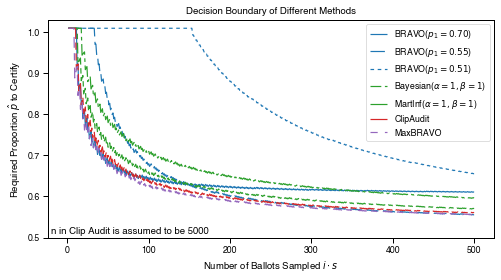

In [238]:
import seaborn as sns
sns.set_context("paper")

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
dash_styles = [(1, 0),
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2)]
dash_styles = [ [3*x for x in L ] for L in dash_styles ]

# dash_styles = ['-',
#                '-',
#                '--',
#                (20, 10),
#                (10, 5),
#                (5, 5, 2, 5),
#                (3, 3, 1, 1)]

current_palette = sns.color_palette()
palatte = [
    current_palette[0],
    current_palette[0],
    current_palette[0],
    current_palette[2],
    current_palette[2],
    current_palette[3],
    current_palette[4],
]

lws = [
    100, 5, 3,
    5, 3,
    5, 3
]

alphas = [
    
]

plt.figure(figsize=[8, 4])
sns.lineplot(data=boundaries_df.iloc[0:500], dashes=dash_styles, palette=palatte, size=, sizes=lws)
plt.ylim([0.5, 1.03])
plt.ylabel(r'Required Proportion $\hat{p}$ to Certify')
plt.xlabel(r'Number of Ballots Sampled $i\cdot s$')
plt.title(r'Decision Boundary of Different Methods')

plt.legend([
    r'BRAVO($p_1 = 0.70$)',
    r'BRAVO($p_1 = 0.55$)',
    r'BRAVO($p_1 = 0.51$)',
    r'Bayesian($\alpha=1, \beta=1$)',
    r'MartInf($\alpha=1, \beta=1$)',
    r'ClipAudit',
    r'MaxBRAVO',
])

plt.annotate('n in Clip Audit is assumed to be 5000', (-20, 0.51))

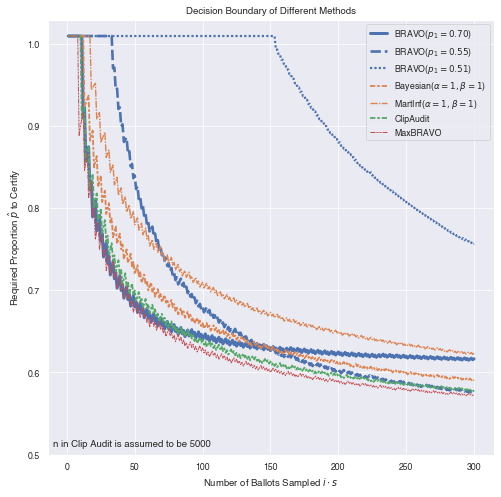

In [310]:
import seaborn as sns
sns.set_context("paper")

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
dash_styles = [(1, 0),
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2)]
dash_styles = [ [3*x for x in L ] for L in dash_styles ]

# dash_styles = ['-',
#                '-',
#                '--',
#                (20, 10),
#                (10, 5),
#                (5, 5, 2, 5),
#                (3, 3, 1, 1)]

current_palette = sns.color_palette()
palatte = [
    current_palette[0],
    current_palette[0],
    current_palette[0],
    current_palette[2],
    current_palette[2],
    current_palette[3],
    current_palette[4],
]

lws = [
    100, 5, 3,
    5, 3,
    5, 3
]

alphas = [
    
]

plt.figure(figsize=[8, 8])

sns.lineplot(x='index', 
             y='value', 
             hue='type',
             size='parameter',
             style='parameter',
             data=boundaries_df_long.query('index <= 300'), 
#              dashes=dash_styles, 
#              palette=palatte, 
             sizes=(1, 3)
            )
plt.ylim([0.5, 1.03])
plt.ylabel(r'Required Proportion $\hat{p}$ to Certify')
plt.xlabel(r'Number of Ballots Sampled $i\cdot s$')
plt.title(r'Decision Boundary of Different Methods')

plt.legend([
    r'BRAVO($p_1 = 0.70$)',
    r'BRAVO($p_1 = 0.55$)',
    r'BRAVO($p_1 = 0.51$)',
    r'Bayesian($\alpha=1, \beta=1$)',
    r'MartInf($\alpha=1, \beta=1$)',
    r'ClipAudit',
    r'MaxBRAVO',
])

plt.annotate('n in Clip Audit is assumed to be 5000', (-10, 0.51))

plt.savefig('../../report_figures/decision_boundary.png')